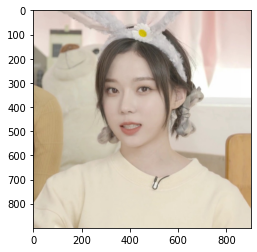

rectangles[[(213, 213) (545, 546)]]


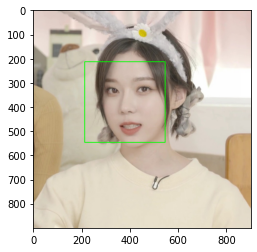

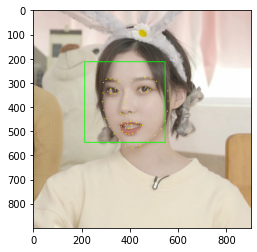

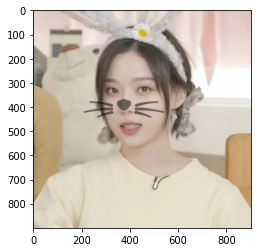

In [23]:
#라이브러리와 모듈 호출
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/윈터사진(정면).png'
img_bgr = cv2.imread(my_image_path) #OpenCV로 이미지를 불러옴
img_show = img_bgr.copy() # 출력용 이미지를 따로 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # bgr형태를 rgb로 변경
plt.imshow(img_rgb)
plt.show() # 사진이 다시 rgb로 바뀐 것 확인

detector_hog = dlib.get_frontal_face_detector() #detector선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 2) # bounding box 추출

print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    r = dlib_rect.right()
    t = dlib_rect.top()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) #얼굴 찾기
plt.imshow(img_show_rgb)
plt.show() #얼굴찾은 결과확인

# 저장한 landmark 모델을 불러옴
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아soa
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points) #랜드마크들을 얼굴에 저장(68개)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show() #랜드마크를 영상에 출력

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2 #x,y=>스티커 위치
    w = h = dlib_rect.width() # w,h => 스티커 크기 (268,268)
    
    sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/고양이 수염.png'# 스티커 이미지를 불러옵니다
    img_sticker = cv2.imread(sticker_path) 
    img_sticker = cv2.resize(img_sticker, (w,h)) #위의 w,h크기로 resize
    refined_x = x - w // 2 
    refined_y = y  #원본에 스티커를 추가하기 위해 x,y좌표 조정 cuase 이미지 시작점 좌상단
    # x,y를 보면 y는 음수가 나오는데 이는 이미지 범위 밖이기 때문
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0
    #스티커 사진이 오른쪽이나 아래쪽으로 넘어가는 경우에 대해서 처리

# 원본이미지에 스티커 적용 
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

# 불투명도 조절
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.5, 0)

# 결과이미지 출력
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()


# 각도 조절 사진

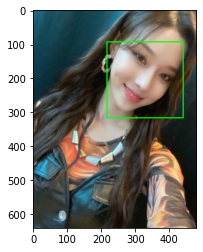

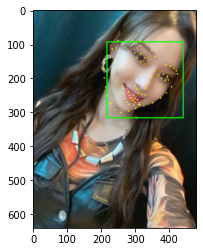

(326, 229)


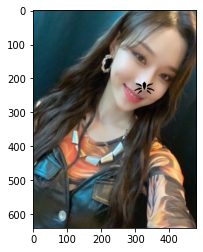

(326, 229)
214 182
이미지가 기울어진 각도: -40.38


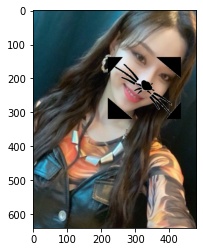

In [34]:
#라이브러리와 모듈 호출
import math

# 사진 불러오기
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/윈터(회전).png'
img_bgr = cv2.imread(my_image_path)  # OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (480, 640))    # Resize
img_show = img_bgr.copy()      # 출력용 이미지 별도 카피

# 얼굴 검출
import dlib
detector_hog = dlib.get_frontal_face_detector()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 얼굴에 랜드마크
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(landmark):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#스티커 적용하기
for dlib_rect,landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]
    y = landmark[30][1]
    w = (landmark[30][0] - landmark[36][0])*2
    h = (landmark[48][1] - landmark[2][1])*2
    
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/고양이 수염.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)

refined_x = x-w//2
refined_y = y-h//2

x_shape = img_sticker.shape[0]
y_shape = img_sticker.shape[1]

sticker_area = img_bgr[refined_y:refined_y+x_shape, refined_x:refined_x+y_shape]
img_bgr[refined_y:refined_y+x_shape, refined_x:refined_x+y_shape] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()


#스티커 적용 수정
for dlib_rect,landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]
    y = landmark[30][1]
    w = int(math.sqrt((x-landmark[36][0])**2 + (landmark[30][1]-landmark[36][1])**2)*2)
    h = int(math.sqrt((landmark[48][1]-landmark[2][1])**2 + (landmark[48][0]-landmark[2][0])**2)*2)
    print(w, h)
    
# 스티커 이미지를 불러와서 사이즈와 색상을 변경합니다.
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/고양이 수염.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)

# 스티커의 x좌표와, y좌표를 설정합니다. 
sticker_x = img_sticker.shape[0]
sticker_y = img_sticker.shape[1]

# 전체 이미지에서 스티커가 시작할 좌표를 설정합니다. 
refined_x = x-w//2
refined_y = y-h//2

# 스티커가 들어갈 영역입니다. 
sticker_area = img_bgr[refined_y:refined_y+sticker_x, refined_x:refined_x+sticker_y]

# 이미지에서 얼굴의 회전 각도를 구합니다. 
height, width, channel = img_sticker.shape
ang = math.atan(h/w)/math.pi*180
print("이미지가 기울어진 각도:", -round(ang,2))

# 각도에 맞춰 스티커를 회전시킵니다.
# 시계 방향으로 기울어져 있기 때문에 -를 붙입니다. 
matrix = cv2.getRotationMatrix2D((width/2, height/2), -ang, 1)
img_sticker = cv2.warpAffine(img_sticker, matrix, (width, height))

img_bgr[refined_y:refined_y+sticker_x, refined_x:refined_x+sticker_y] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 노드를 진행하면서 어려웠던 점

- 기본적인 전체적인 코딩을 하나하나 세운게 아니라 가져다 쓰다보니 이해하는데 시간이 오래걸림
- 스티커의 시작점을 계산하는 과정이 많이 헷갈렸음
- 고양이 수염 스티커의 불투명도를 조절해야하는 절차가 추가되어야 했음
- 얼굴 각도 회전에 대한 요소 추가

# 해결해가는 과정

- 노드를 반복해서 보면서 이해하면서 해결
- 채은님의 조언을 듣고 계산을 해봤는데 한번에는 못 맞추고 수치를 바꿔가면서 원래 파악을 통해 해결
    https://shate-programming.tistory.com/25 이 블로그도 참조
- 처음에는 사진을 잘못 다운 받은 줄 알고 그걸 고쳤었는데 불투명도를 조절해야됨을 깨닫고 스티커 이외의 부분을 다 0으로 처리하는 방법을 찾아냄
- 각도 계사